# Fig2. Single cell dynamics of Diptericin activation

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
from scipy.stats import linregress
from diptericin_paper_utils import dpt, colors

In [30]:
#%matplotlib qt
%matplotlib inline

In [6]:
"""plot style"""
linewidth = 4
mpl.rc('axes', linewidth=linewidth)
mpl.rc('font', family='Arial')
fontsize = 24
markersize = 18
markeredgewidth = 2


colors = {'no_inj': [0.8, 0.8, 0.8],
         'mock': [0.4, 0.4, 0.4],
         'e.coli': [0, 0.4, 0]}

def style_axes(ax, fontsize=24):
    plt.minorticks_off()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    plt.tight_layout()
    
    return ax


In [27]:
"""insert path to the folder of all data files here"""
path_to_supplemental_data_files = r'/home/brandon/Documents/Code/diptericin-paper/SupplementalDataFiles_revision'

# Fig. 3B
Single-cell DptA traces. Additional color adjustment was done in post.

In [34]:
df = pd.read_csv(path_to_supplemental_data_files + '/Fig3/timeseries_1.csv')
df_exp2 = pd.read_csv(path_to_supplemental_data_files + '/Fig3/timeseries_2.csv')

"""group cells based on their ap position"""
df1 = df[df.y < 1000]
df2 = df[np.array(df.y.values >= 1000) * np.array(df.y.values < 2000)]
df3 = df[df.y > 2000]

df_exp2_anterior = df_exp2[df_exp2.y < 1000]
df_exp2_middle = df_exp2[np.array(df_exp2.y.values >= 1000) * np.array(df_exp2.y.values < 2400)]
df_exp2_posterior = df_exp2[np.array(df_exp2.y.values > 2400)]


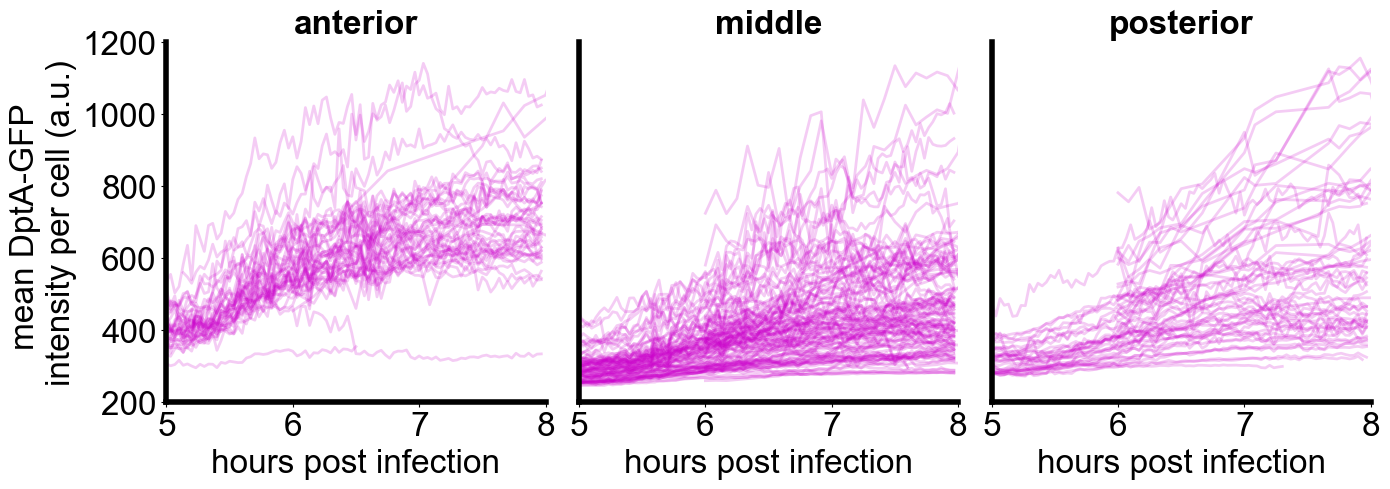

In [35]:
"""plot individual traces colored by slope"""
slope_bins = np.linspace(0, 4, 100)
color = colors['bacteria'] + [0.2,]



plt.figure(figsize=(14, 5))

"""anterior"""
plt.subplot(131)
# dataset 2
t_fit_max = 12
t_fit_min = 0
minutes_per_time_point = 5
start_hour = 6

this_df = df_exp2_anterior
nuc_ids = this_df.particle.unique()
slope_list_exp2_anterior = []
inten_6hpi_exp2_anterior = []
for i in range(len(nuc_ids)):
    sub_df = this_df[this_df.particle == nuc_ids[i]]
    sub_df = sub_df.sort_values(by='t')
    if any(sub_df.groupby(by='t').size().values > 1):
        continue
    t = sub_df.t
    dpt = sub_df.mean_dpt
    
    dpt = dpt[t <= t_fit_max]
    t = t[t <= t_fit_max]
    
    dpt = dpt[t > t_fit_min]
    t = t[t > t_fit_min]
    
    if len(t) > 4:
        slope, intercept, r, p, se = linregress(minutes_per_time_point * t, dpt)
        slope_list_exp2_anterior.append(slope)
        
        t6hpi_index = np.where(t * minutes_per_time_point / 60 + start_hour > 6)[0][0]
        inten_6hpi_exp2_anterior.append(dpt.values[t6hpi_index])

        slope_index = np.where(np.abs(slope - slope_bins) == np.min(np.abs(slope - slope_bins)))[0][0]

        t = sub_df.t
        dpt = sub_df.mean_dpt
        plt.plot((t.values * minutes_per_time_point / 60) + start_hour, dpt.values, linewidth=2, color=color)

        
# dataset 1
t_fit_max = 40
t_fit_min = 10
minutes_per_time_point = 2

this_df = df1
nuc_ids = this_df.particle.unique()
slope_list_anterior = []
inten_6hpi_exp1_anterior = []
for i in range(len(nuc_ids)):
    sub_df = this_df[this_df.particle == nuc_ids[i]]
    sub_df = sub_df.sort_values(by='t')
    if any(sub_df.groupby(by='t').size().values > 1):
        continue
    t = sub_df.t
    dpt = sub_df.mean_dpt
    
    dpt = dpt[t <= t_fit_max]
    t = t[t <= t_fit_max]
    
    dpt = dpt[t > t_fit_min]
    t = t[t > t_fit_min]
    
    if len(t) > 4:
        slope, intercept, r, p, se = linregress(minutes_per_time_point * t, dpt)
        slope_list_anterior.append(slope)
        
        t6hpi_index = np.where(t * minutes_per_time_point / 60 + 5 > 6)[0][0]
        inten_6hpi_exp1_anterior.append(dpt.values[t6hpi_index])
        
        slope_index = np.where(np.abs(slope - slope_bins) == np.min(np.abs(slope - slope_bins)))[0][0]
        
        t = sub_df.t
        dpt = sub_df.mean_dpt
        plt.plot((t.values * 2 / 60) + 5, dpt.values, linewidth=2, color=color)


plt.xlabel('hours post infection', fontsize=fontsize)
plt.ylabel('mean DptA-GFP \nintensity per cell (a.u.)', fontsize=fontsize)
plt.title('anterior', fontsize=fontsize, fontweight='bold')
plt.ylim([200, 1200])
plt.xlim([5, 8])
ax = style_axes(plt.gca())


"""# middle """
#plt.figure()
plt.subplot(132)
# dataset 2
t_fit_max = 12
t_fit_min = 0
minutes_per_time_point = 5
start_hour = 6

this_df = df_exp2_middle
nuc_ids = this_df.particle.unique()
slope_list_exp2_middle = []
inten_6hpi_exp2_middle = []
for i in range(len(nuc_ids)):
    sub_df = this_df[this_df.particle == nuc_ids[i]]
    sub_df = sub_df.sort_values(by='t')
    if any(sub_df.groupby(by='t').size().values > 1):
        continue
    t = sub_df.t
    dpt = sub_df.mean_dpt
    
    dpt = dpt[t <= t_fit_max]
    t = t[t <= t_fit_max]
    
    dpt = dpt[t > t_fit_min]
    t = t[t > t_fit_min]
    
    if len(t) > 4:
        slope, intercept, r, p, se = linregress(minutes_per_time_point * t, dpt)
        slope_list_exp2_anterior.append(slope)
        
        t6hpi_index = np.where(t * minutes_per_time_point / 60 + start_hour > 6)[0][0]
        inten_6hpi_exp2_middle.append(dpt.values[t6hpi_index])
        
        slope_index = np.where(np.abs(slope - slope_bins) == np.min(np.abs(slope - slope_bins)))[0][0]

        t = sub_df.t
        dpt = sub_df.mean_dpt
        plt.plot((t.values * minutes_per_time_point / 60) + start_hour, dpt.values, linewidth=2, color=color)

        
        
# datset 1
t_fit_max = 40
t_fit_min = 10
minutes_per_time_point = 2

this_df = df2
nuc_ids = this_df.particle.unique()
slope_list_middle = []
inten_6hpi_exp1_middle = []
for i in range(len(nuc_ids)):
    sub_df = this_df[this_df.particle == nuc_ids[i]]
    sub_df = sub_df.sort_values(by='t')
    if any(sub_df.groupby(by='t').size().values > 1):
        continue
    t = sub_df.t
    dpt = sub_df.mean_dpt
    
    dpt = dpt[t <= t_fit_max]
    t = t[t <= t_fit_max]
    
    dpt = dpt[t > t_fit_min]
    t = t[t > t_fit_min]
    
    if len(t) > 4:
        slope, intercept, r, p, se = linregress(minutes_per_time_point * t, dpt)
        slope_list_middle.append(slope)

        t6hpi_index = np.where(t * minutes_per_time_point / 60 + 5 > 6)[0][0]
        inten_6hpi_exp1_middle.append(dpt.values[t6hpi_index])
        
        slope_index = np.where(np.abs(slope - slope_bins) == np.min(np.abs(slope - slope_bins)))[0][0]
        
        t = sub_df.t
        dpt = sub_df.mean_dpt
        plt.plot(t.values * minutes_per_time_point / 60 + 5, dpt.values, linewidth=2, color=color)



plt.xlabel('hours post infection', fontsize=fontsize)
#plt.ylabel('mean diptericin-GFP \nintensity per cell (a.u.)', fontsize=fontsize)
plt.title('middle', fontsize=fontsize, fontweight='bold')
plt.ylim([200, 1200])
plt.yticks([])
plt.xlim([5, 8])
ax = style_axes(plt.gca())

"""# posterior"""
#plt.figure()
plt.subplot(133)
# dataset 2
t_fit_max = 12
t_fit_min = 0
minutes_per_time_point = 5
start_hour = 6

this_df = df_exp2_posterior
nuc_ids = this_df.particle.unique()
slope_list_exp2_posterior = []
inten_6hpi_exp2_posterior = []
for i in range(len(nuc_ids)):
    sub_df = this_df[this_df.particle == nuc_ids[i]]
    sub_df = sub_df.sort_values(by='t')
    if any(sub_df.groupby(by='t').size().values > 1):
        continue
    t = sub_df.t
    dpt = sub_df.mean_dpt
    
    dpt = dpt[t <= t_fit_max]
    t = t[t <= t_fit_max]
    
    dpt = dpt[t > t_fit_min]
    t = t[t > t_fit_min]
    
    if len(t) > 4:
        slope, intercept, r, p, se = linregress(minutes_per_time_point * t, dpt)
        slope_list_exp2_posterior.append(slope)
        
        t6hpi_index = np.where(t * minutes_per_time_point / 60 + start_hour > 6)[0][0]
        inten_6hpi_exp2_posterior.append(dpt.values[t6hpi_index])
        
        slope_index = np.where(np.abs(slope - slope_bins) == np.min(np.abs(slope - slope_bins)))[0][0]

        t = sub_df.t
        dpt = sub_df.mean_dpt
        plt.plot((t.values * minutes_per_time_point / 60) + start_hour, dpt.values, linewidth=2, color=color)

        
# dataset 1
t_fit_max = 40
t_fit_min = 10
minutes_per_time_point = 2

this_df = df3
nuc_ids = this_df.particle.unique()
slope_list_posterior = []
inten_6hpi_exp1_posterior = []
for i in range(len(nuc_ids)):
    sub_df = this_df[this_df.particle == nuc_ids[i]]
    sub_df = sub_df.sort_values(by='t')
    if any(sub_df.groupby(by='t').size().values > 1):
        continue
    t = sub_df.t
    dpt = sub_df.mean_dpt
    
    dpt = dpt[t <= t_fit_max]
    t = t[t <= t_fit_max]
    
    dpt = dpt[t > t_fit_min]
    t = t[t > t_fit_min]
    
    if len(t) > 4:
        slope, intercept, r, p, se = linregress(minutes_per_time_point * t, dpt)
        slope_list_posterior.append(slope)

        t6hpi_index = np.where(t * minutes_per_time_point / 60 + 5 > 6)[0][0]
        inten_6hpi_exp1_posterior.append(dpt.values[t6hpi_index])
        
        slope_index = np.where(np.abs(slope - slope_bins) == np.min(np.abs(slope - slope_bins)))[0][0]
        
        t = sub_df.t
        dpt = sub_df.mean_dpt
        plt.plot(t.values * minutes_per_time_point / 60 + 5, dpt.values, linewidth=2, color=color)



        
plt.xlabel('hours post infection', fontsize=fontsize)
#plt.ylabel('mean diptericin-GFP \nintensity per cell (a.u.)', fontsize=fontsize)
plt.title('posterior', fontsize=fontsize, fontweight='bold')
plt.ylim([200, 1200])
plt.yticks([])
plt.xlim([5, 8])
ax = style_axes(plt.gca())


In [18]:
#plt.savefig(r'/home/brandon/Documents/Code/diptericin-paper/figures/Fig2-SingleCellDynamics/traces_colorbar_magenta-green.pdf')

## Fig. 2C
Dot plot of median activation rates

## Plot dot plot of median rate combining both experiments

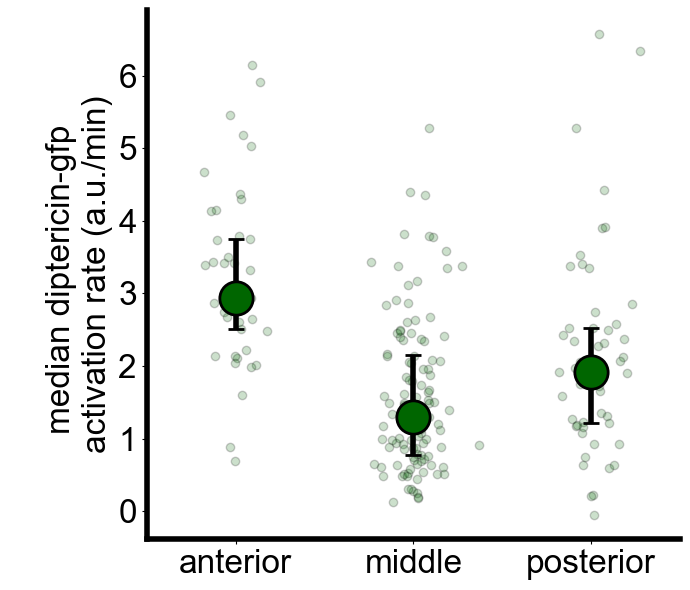

In [38]:
all_slopes_anterior = slope_list_anterior + slope_list_exp2_anterior
all_slopes_middle = slope_list_middle + slope_list_exp2_middle
all_slopes_posterior = slope_list_posterior + slope_list_exp2_posterior

sig_x = 0.1
plt.figure(figsize=(7,6))
small_alpha = 0.2
markersize=24
"""anterior"""
x = 0
these_slopes = all_slopes_anterior
plt.plot(x * np.ones_like(these_slopes) + sig_x * np.random.normal(size=len(these_slopes)), these_slopes, 'ko', markersize=6, markerfacecolor=colors['e.coli'] + [small_alpha,])
q = np.quantile(these_slopes, q=[0.25, 0.5, 0.75])
yerr = np.array([[q[1] - q[0]], [q[2] - q[1]]])
plt.errorbar(x, q[1], yerr, marker='o', markersize=markersize, markerfacecolor=colors['e.coli'], markeredgewidth=2, markeredgecolor='k', ecolor='k', elinewidth=4, capsize=6)


"""middle"""
x = 1
these_slopes = all_slopes_middle
plt.plot(x * np.ones_like(these_slopes) + sig_x * np.random.normal(size=len(these_slopes)), these_slopes, 'ko', markersize=6, markerfacecolor=colors['e.coli'] + [small_alpha,])
q = np.quantile(these_slopes, q=[0.25, 0.5, 0.75])
yerr = np.array([[q[1] - q[0]], [q[2] - q[1]]])
plt.errorbar(x, q[1], yerr, marker='o', markersize=markersize, markerfacecolor=colors['e.coli'], markeredgewidth=2, markeredgecolor='k', ecolor='k', elinewidth=4, capsize=6)

"""middle"""
x = 2
these_slopes = all_slopes_posterior
plt.plot(x * np.ones_like(these_slopes) + sig_x * np.random.normal(size=len(these_slopes)), these_slopes, 'ko', markersize=6, markerfacecolor=colors['e.coli'] + [small_alpha,])
q = np.quantile(these_slopes, q=[0.25, 0.5, 0.75])
yerr = np.array([[q[1] - q[0]], [q[2] - q[1]]])
plt.errorbar(x, q[1], yerr, marker='o', markersize=markersize, markerfacecolor=colors['e.coli'], markeredgewidth=2, markeredgecolor='k', ecolor='k', elinewidth=4, capsize=6)


plt.xticks([0, 1, 2], labels=['anterior', 'middle', 'posterior'])
plt.xlim([-0.5, 2.5])
plt.ylabel('\nmedian diptericin-gfp \nactivation rate (a.u./min)', fontsize=fontsize)
#plt.legend(fontsize=0.75 * fontsize, loc='upper left', bbox_to_anchor=(-0.5, 1.2), ncol=2, fancybox=True, facecolor=np.array([210, 180, 140]) / 255, framealpha=0.5)
ax = style_axes(plt.gca())


In [28]:
#plt.savefig(r'/home/brandon/Documents/Code/diptericin-paper/figures/Fig2-SingleCellDynamics/median_rate_dot_plot_ant_med_pos_both_expmts.pdf')

## Fig. 2D
scatter plot of rate vs intensity

R^2 = 0.6141087952431347


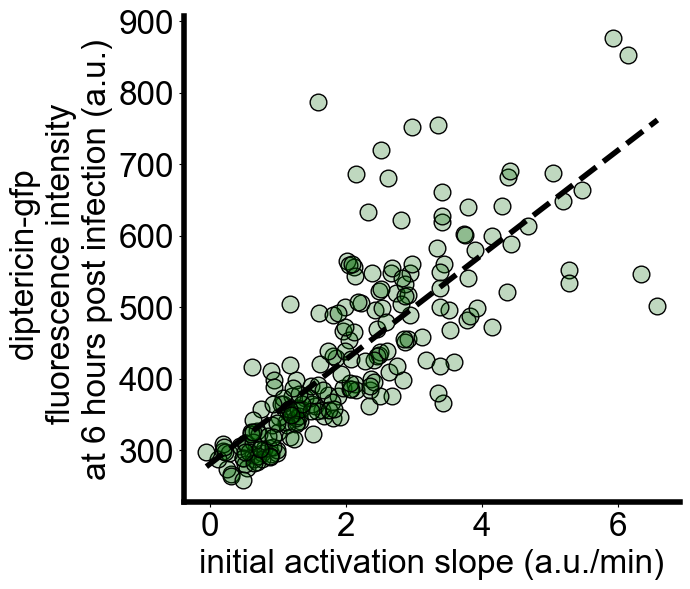

In [39]:
all_inten_6hpi = inten_6hpi_exp1_anterior + inten_6hpi_exp2_anterior + inten_6hpi_exp1_middle + inten_6hpi_exp2_middle + inten_6hpi_exp1_posterior + inten_6hpi_exp2_posterior
all_slopes = slope_list_anterior + slope_list_exp2_anterior + slope_list_middle + slope_list_exp2_middle + slope_list_posterior + slope_list_exp2_posterior
plt.figure(figsize=(7,6))
markersize = 12
markeredgewidth = 1
plt.plot(all_slopes, all_inten_6hpi, 'ko', markerfacecolor=colors['e.coli'] + [0.25,],  markersize=markersize, markeredgewidth=markeredgewidth, markeredgecolor='k', label='experiment 1')

x = all_slopes
y = all_inten_6hpi


slope, intercept, r, p, se = linregress(x, y)
print(f'R^2 = {r ** 2}')
x = np.linspace(np.min(x), np.max(x), 5)
plt.plot(x, intercept + slope * np.array(x), 'k--', linewidth=4)

plt.xlabel('initial activation slope (a.u./min)', fontsize=fontsize)
plt.ylabel('diptericin-gfp \nfluorescence intensity \nat 6 hours post infection (a.u.)', fontsize=fontsize)
ax = style_axes(plt.gca())


In [30]:
#plt.savefig(r'/home/brandon/Documents/Code/diptericin-paper/figures/Fig2-SingleCellDynamics/rate_vs_inten_6hpi_scatter_plot.pdf')